In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:12pt; line-height:40px;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2. K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘은 교안 6쪽 및 DL 군집분석 소스 참조

In [42]:
# 군집분석을 하기 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 개수
                           n_features=2, # 독립변수 개수(기본값 20)
                           n_informative=2, # 타겟변수에 영향을 미치는 독립변수 개수
                           n_redundant=0, # 타겟변수에 영향을 미치지 않는 독립변수 개수
                           n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹의 수(서브그룹 없음)
                           n_classes=2, # 타겟변수의 그룹 수
                           random_state=123
                           ) 
import numpy as np
print(X.shape, y.shape)
np.c_[X, y]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ],
       [ 0.90134424, -0.75896558,  1.        ],
       [ 0.83653082,  1.40488232,  0.        ],
       [-0.02317631, -0.87481215,  1.        ],
       [ 0.83780453, -0.554389  ,  0.        ],
       [-1.9295722 , -1.91894047,  1.        ],
       [-0.8124957 ,  0.61140818,  1.        ],
       [ 1.12694685,  1.69570061,  0.        ],
       [ 0.80138648, -0.28232585,  0.        ],
       [ 0.9399586 ,  1.9518949 ,  0.        ],
       [ 1.24232232,  1.6146173 ,  0.        ],
       [-1.48554751, -0.69890985,  1.        ],
       [ 1.24732102, -1.38872822,  1.        ],
       [-2.95714561, -1.18843377,  1.        ],
       [-1.5849172 , -0.88425569,  1.        ],
       [-2.0197379 , -0.65350646,  1.        ],
       [ 0.98786201,  0.64060416,  0.        ],
       [ 1.17380403,  1.21379918,  0.        ]])

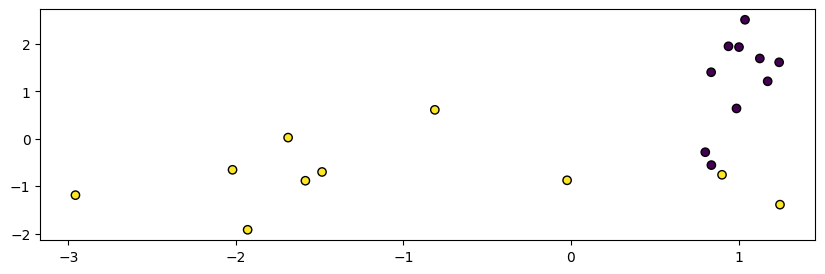

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, edgecolors='k')
plt.show()

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 개수
               init='k-means++', # 초기 중심점을 서로 멀리 초기화. random(초기 중심점이 랜덤)
               n_init=10, # 각각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
               max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [45]:
centers = model.cluster_centers_ # 각 그룹의 중심점 좌표쌍 2개
print('model.labels_ :', model.labels_)
pred = model.predict(X)
print('predicted     :', pred)
print('actual y data :', y)

model.labels_ : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
predicted     : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
actual y data : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


In [46]:
centers

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

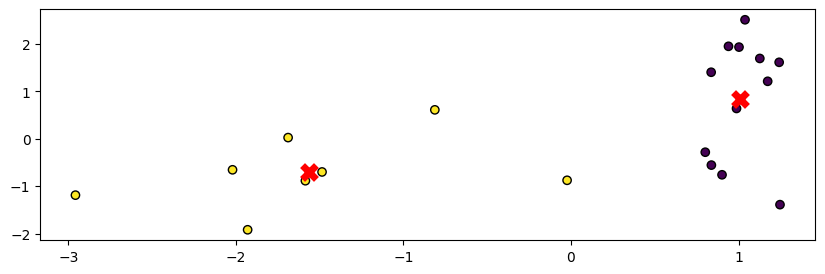

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:, 1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y = centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.show()

## cf. Normalizer(scaler) 적용

In [48]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667],
       [ 0.90134424, -0.75896558,  0.76493676, -0.64410538],
       [ 0.83653082,  1.40488232,  0.51161542,  0.85921456],
       [-0.02317631, -0.87481215, -0.02648361, -0.99964925],
       [ 0.83780453, -0.554389  ,  0.83395074, -0.55183889],
       [-1.9295722 , -1.91894047, -0.7090575 , -0.70515067],
       [-0.8124957 ,  0.61140818, -0.79903769,  0.60128094],
       [ 1.12694685,  1.69570061,  0.55350265,  0.83284742],
       [ 0.80138648, -0.28232585,  0.94318094, -0.33227958],
       [ 0.9399586 ,  1.9518949 ,  0.43387458,  0.90097328],
       [ 1.24232232,  1.6146173 ,  0.60980605,  0.79255068],
       [-1.48554751, -0.69890985, -0.90485891, -0.42571159],
       [ 1.24732102, -1.38872822,  0.66821427, -0.74396888],
       [-2.95714561, -1.18843377, -0.92787221, -0.37289833],
       [-1.5849172 , -0.

In [49]:
model = KMeans(n_clusters=2, # 군의 개수
               init='random',
               n_init='auto', # init가 k-means++이면 1, init가 random이면 10 
               max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [50]:
Xnor[model.labels_]

array([[0.46005267, 0.88789162],
       [0.46005267, 0.88789162],
       [0.3821159 , 0.92411441],
       [0.46005267, 0.88789162],
       [0.46005267, 0.88789162],
       [0.3821159 , 0.92411441],
       [0.46005267, 0.88789162],
       [0.3821159 , 0.92411441],
       [0.3821159 , 0.92411441],
       [0.46005267, 0.88789162],
       [0.46005267, 0.88789162],
       [0.46005267, 0.88789162],
       [0.46005267, 0.88789162],
       [0.3821159 , 0.92411441],
       [0.46005267, 0.88789162],
       [0.3821159 , 0.92411441],
       [0.3821159 , 0.92411441],
       [0.3821159 , 0.92411441],
       [0.46005267, 0.88789162],
       [0.46005267, 0.88789162]])

In [51]:
Xnor[model.labels_==0]

array([[-0.99988146,  0.01539667],
       [-0.02648361, -0.99964925],
       [-0.7090575 , -0.70515067],
       [-0.79903769,  0.60128094],
       [-0.90485891, -0.42571159],
       [-0.92787221, -0.37289833],
       [-0.87327958, -0.48721942],
       [-0.95143599, -0.30784666]])

In [52]:
Xnor[model.labels_==1]

array([[ 0.3821159 ,  0.92411441],
       [ 0.46005267,  0.88789162],
       [ 0.76493676, -0.64410538],
       [ 0.51161542,  0.85921456],
       [ 0.83395074, -0.55183889],
       [ 0.55350265,  0.83284742],
       [ 0.94318094, -0.33227958],
       [ 0.43387458,  0.90097328],
       [ 0.60980605,  0.79255068],
       [ 0.66821427, -0.74396888],
       [ 0.83902767,  0.54408875],
       [ 0.69516439,  0.7188508 ]])

In [53]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_== 0, 0] # x축

array([-0.99988146, -0.02648361, -0.7090575 , -0.79903769, -0.90485891,
       -0.92787221, -0.87327958, -0.95143599])

In [54]:
Xnor[model.labels_== 0, 1] # y축

array([ 0.01539667, -0.99964925, -0.70515067,  0.60128094, -0.42571159,
       -0.37289833, -0.48721942, -0.30784666])

In [55]:
model.cluster_centers_

array([[-0.77398837, -0.33522479],
       [ 0.64128684,  0.34902823]])

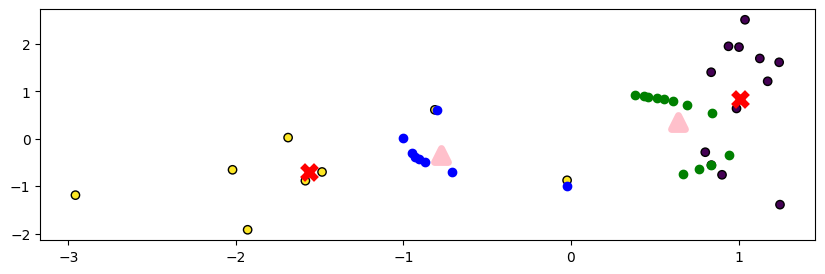

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:, 1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y = centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.scatter(x=Xnor[model.labels_== 0, 0],
            y=Xnor[model.labels_== 0, 1], c='b')
plt.scatter(x=Xnor[model.labels_== 1, 0],
            y=Xnor[model.labels_== 1, 1], c='g')
plt.scatter(x=model.cluster_centers_[:, 0],
            y=model.cluster_centers_[:, 1], c='pink', marker='^', s=100, lw=5)
plt.show()

## K-Means 클러스터링의 한계점(13쪽)
- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 구형이 아닐 경우==군이 비구형일 경우
    
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링

### ※ 군의 크기가 다른 경우

In [69]:
np.random.seed(0)
# group 0 : 평균 -10, 표준편차 2인 10행 2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ],
       [ -8.09982316, -10.30271442,   0.        ],
       [-10.2064377 ,  -9.178803  ,   0.        ],
       [ -9.71191286,  -7.09145299,   0.        ],
       [ -8.47792455,  -9.75664997,   0.        ],
       [ -9.11227353,  -9.33265135,   0.        ],
       [ -7.01184185, -10.41031653,   0.        ],
       [ -9.3738646 , -11.70819148,   0.        ]])

In [71]:
# group 1 : 평균 10, 표준편차 2인 10행 2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1

array([[ 7.90289407,  7.15996413,  1.        ],
       [ 6.58745962, 13.90155079,  1.        ],
       [ 8.98069564,  9.1238514 ,  1.        ],
       [ 7.49440928, 11.55498071,  1.        ],
       [ 6.7722043 ,  9.57451944,  1.        ],
       [ 8.20906688, 10.773805  ,  1.        ],
       [ 8.97838972,  7.63873563,  1.        ],
       [ 9.94363554, 10.85666374,  1.        ],
       [10.13303444, 10.6049438 ,  1.        ],
       [ 8.73135581,  9.27451767,  1.        ]])

In [83]:
# group 2 : 평균 0, 표준편차 5인 100행 2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2), 2)
group2 = np.c_[group2, y]
group2

array([[ 6.57869840e-01, -7.02780024e+00,  2.00000000e+00],
       [-1.74891090e+00,  1.01173597e+01,  2.00000000e+00],
       [ 2.52693469e+00,  1.79624578e+00,  2.00000000e+00],
       [-7.91247239e+00,  1.12180095e+01,  2.00000000e+00],
       [-7.11397454e+00,  9.61162378e+00,  2.00000000e+00],
       [-1.05752801e+01,  7.02682719e+00,  2.00000000e+00],
       [ 8.09027135e+00, -4.12204561e+00,  2.00000000e+00],
       [ 2.11290186e+00,  2.73740286e+00,  2.00000000e+00],
       [-4.06897242e+00, -7.24558805e+00,  2.00000000e+00],
       [-6.58858672e+00,  2.70504110e+00,  2.00000000e+00],
       [-4.25578013e-01, -2.82150517e+00,  2.00000000e+00],
       [ 4.83384006e+00,  2.54033955e+00,  2.00000000e+00],
       [-3.77731363e+00, -6.00600760e+00,  2.00000000e+00],
       [ 2.61630869e+00, -2.68791684e+00,  2.00000000e+00],
       [ 4.96024313e-01,  7.88149486e+00,  2.00000000e+00],
       [ 2.51164120e+00, -4.31133500e+00,  2.00000000e+00],
       [ 8.03305949e-01, -4.76322476e+00

In [84]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 7.90289407,  7.15996413,  1.        ],
        [ 0.65786984, -7.02780024,  2.        ],
        [-0.42557801, -2.82150517,  2.        ],
        [-7.23210532, -2.26175138,  2.        ],
        [-1.62467479, -3.5565318 ,  2.        ],
        [-2.33746587, -4.3124665 ,  2.        ],
        [ 1.23383012,  7.6297878 ,  2.        ],
        [ 5.20043123,  0.82321905,  2.        ],
        [-2.34655368,  4.37847839,  2.        ],
        [-3.01919776, -5.74777032,  2.        ],
        [ 0.73717201, -4.88732439,  2.        ]]),
 (120, 3))

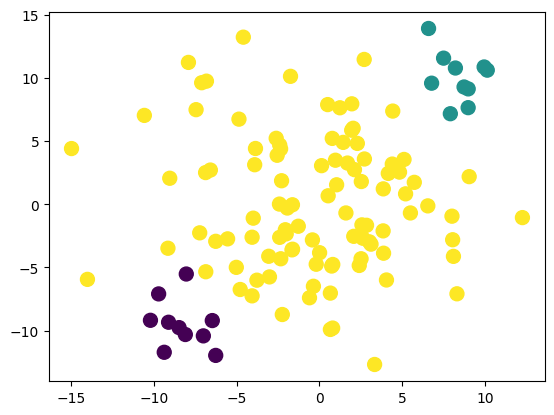

In [85]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], s=100)
plt.show()

In [89]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init='auto'
               )
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [90]:
centers = model.cluster_centers_ # 중심점 3개의 좌표쌍
centers 

array([[-5.71293496,  6.0184018 ],
       [-2.68916314, -5.39493917],
       [ 4.70203355,  4.1618554 ]])

In [92]:
pred = model.predict(data[:, :2]) # 예측값
print(pred)
pred = model.labels_ # 모델이 클러스터링한 결과
print(pred)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 0 2 0 0 0 2 2 1 0 1 2 1 1 2 1 1
 2 2 1 1 2 1 1 2 1 1 0 1 1 1 1 1 2 2 1 2 1 0 0 1 1 2 1 2 0 2 2 1 1 2 0 1 0
 2 2 2 0 0 1 2 2 2 1 0 1 2 1 1 2 0 0 1 2 2 1 1 1 1 1 1 2 2 2 1 1 0 0 1 2 1
 2 2 0 2 2 2 1 1 1]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 0 2 0 0 0 2 2 1 0 1 2 1 1 2 1 1
 2 2 1 1 2 1 1 2 1 1 0 1 1 1 1 1 2 2 1 2 1 0 0 1 1 2 1 2 0 2 2 1 1 2 0 1 0
 2 2 2 0 0 1 2 2 2 1 0 1 2 1 1 2 0 0 1 2 2 1 1 1 1 1 1 2 2 2 1 1 0 0 1 2 1
 2 2 0 2 2 2 1 1 1]


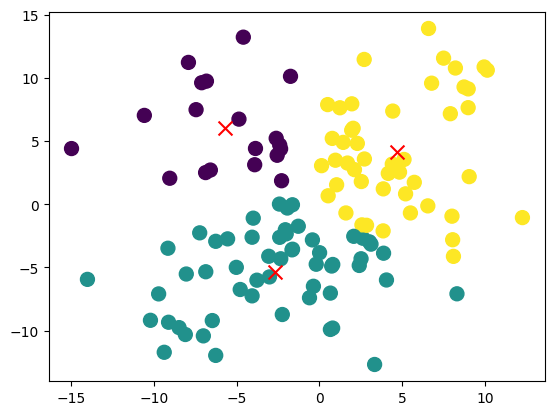

In [95]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', s=100, marker='x')
plt.show()

In [96]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6,
               n_init=10)
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [98]:
centers = model.cluster_centers_
centers

array([[-2.03183718, -4.54718401],
       [ 1.09180377,  4.31420807],
       [ 7.57164151,  9.94039098],
       [-8.67690393, -8.40101865],
       [ 5.00177009, -2.05809269],
       [-7.27639412,  6.47889795]])

In [99]:
pred= model.labels_
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       1, 5, 5, 5, 4, 1, 0, 5, 0, 1, 0, 4, 1, 4, 0, 4, 1, 0, 0, 4, 0, 0,
       4, 4, 0, 5, 0, 0, 0, 0, 0, 4, 4, 4, 1, 0, 5, 5, 0, 4, 4, 4, 1, 5,
       2, 4, 0, 3, 1, 5, 0, 1, 1, 4, 1, 1, 5, 0, 4, 2, 1, 0, 1, 4, 1, 0,
       0, 4, 1, 5, 0, 1, 4, 0, 0, 0, 4, 3, 0, 4, 1, 1, 0, 0, 5, 1, 4, 1,
       0, 1, 1, 5, 4, 1, 1, 0, 0, 3])

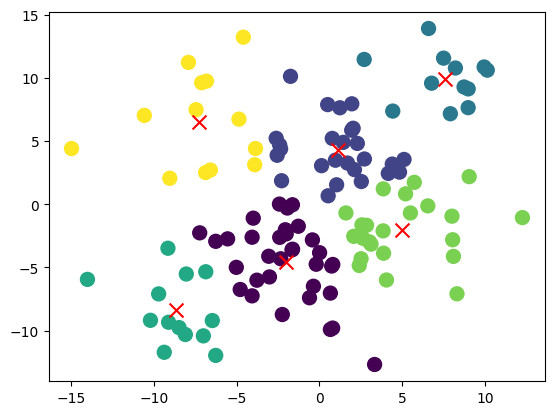

In [100]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='r', s=100, marker='x')
plt.show()

In [101]:
data[pred==0, 0] # 0번 그룹의 x축 데이터

array([ 0.65786984, -4.06897242, -0.42557801, -3.77731363,  0.80330595,
        0.79625234, -7.23210532, -4.78573737, -2.00778772, -1.27978835,
       -4.06797999, -0.36559823, -1.62467479, -1.94077096, -3.99956812,
       -3.06312869, -2.33746587, -2.06135877, -6.26296671, -2.41624771,
       -1.63280489, -0.19633996,  0.65955878, -2.40121021, -0.60203319,
       -1.66051139, -2.24383507, -3.01919776, -5.54738777,  3.32983573,
        0.73717201,  0.007355  , -5.02161356])

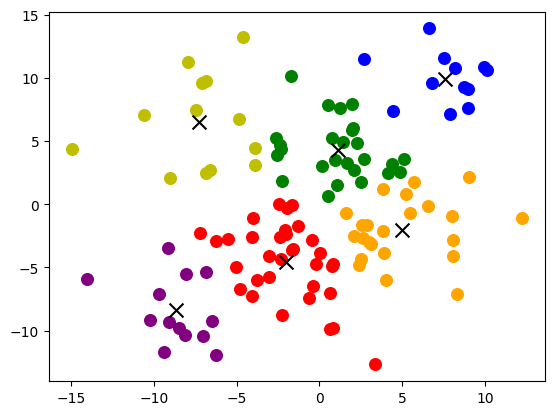

In [104]:
colors = ['r', 'g', 'b', 'purple', 'orange', 'y'] # 0,1,4,5 / 2,3
for i in range(len(colors)):
    plt.scatter(x=data[pred==i,0],
                y=data[pred==i,1], c=colors[i], s=70)
plt.scatter(x=centers[:, 0], y=centers[:, 1], c='k', s=100, marker='x')
plt.show()

# 3. Hierarchical 클러스터링(계층적 군집분석)
- 계층적 분석(linkage) -> 